# Data Acquisition from Different Sources (File Formats)
## Getting and Saving Data

In this notebook we will look at some of the ways we can load data.

## CSV
We can load in comma-separated value files (CSV files) using code akin to the code below (relying on the pandas function `read_csv()`).

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
pop = pd.read_csv("Population_Pyramids.csv")

# A peak at the contents
pop.head()

,Region,Country,Year,Age,Both Sexes Population,Male Population,Female Population,Percent Both Sexes,Percent Male,Percent Female,Sex Ratio
0,Custom Region,Afghanistan,2013,Total,31108077,15782020,15326057,100.0,100.0,100.0,103.0
1,Custom Region,Afghanistan,2013,0-4,4954694,2516706,2437988,15.9,15.9,15.9,103.2
2,Custom Region,Afghanistan,2013,5-9,4237569,2151981,2085588,13.6,13.6,13.6,103.2
3,Custom Region,Afghanistan,2013,10-14,4060950,2064410,1996540,13.1,13.1,13.0,103.4
4,Custom Region,Afghanistan,2013,15-19,3776516,1923726,1852790,12.1,12.2,12.1,103.8


In [38]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 25080 entries, ('Afghanistan', 2013, '0-4') to ('Zimbabwe', 2017, 'Total')
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Both Sexes Population  25080 non-null  int64  
 1   Male Population        25080 non-null  int64  
 2   Female Population      25080 non-null  int64  
 3   Percent Both Sexes     25080 non-null  float64
 4   Percent Male           25080 non-null  float64
 5   Percent Female         25080 non-null  float64
 6   Sex Ratio              25010 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 1.4+ MB


We can set some parameters to do an even better job at getting a good data frame (the one above is fine, but could be better). We want `Country`, `Year`, and `Age` to be indices, and we want to exclude `Region` (no useful information).

In [37]:
pop = pd.read_csv("Population_Pyramids.csv", index_col=['Country', 'Year', 'Age'])
pop.drop('Region', axis=1, inplace=True)
pop.sort_index(inplace=True)    # If we don't do this, some slicing operations won't work (index will not be sorted)
pop.head(1000)

Both Sexes Population  ...  Sex Ratio
Country     Year Age                           ...           
Afghanistan 2013 0-4                  4954694  ...      103.2
                 10-14                4060950  ...      103.4
                 100+                      10  ...       66.7
                 15-19                3776516  ...      103.8
                 20-24                3049334  ...      104.2
...                                       ...  ...        ...
Armenia     2013 25-29                 291106  ...       97.2
                 30-34                 236055  ...       94.6
                 35-39                 194095  ...       90.5
                 40-44                 181127  ...       95.5
                 45-49                 189636  ...       81.6

[1000 rows x 7 columns]

In [4]:
pop.loc[('UnitedStates', 2013), :]    # Usage demonstration

,Both Sexes Population,Male Population,Female Population,Percent Both Sexes,Percent Male,Percent Female,Sex Ratio
Age,,,,,,,
0-4,19853916,10143846,9710070,6.3,6.5,6.0,104.5
10-14,20657299,10547976,10109323,6.5,6.8,6.3,104.3
100+,66189,12287,53902,0.0,0.0,0.0,22.8
15-19,21191148,10855302,10335846,6.7,7.0,6.4,105.0
20-24,22843422,11695317,11148105,7.2,7.5,6.9,104.9
25-29,21600033,10950274,10649759,6.8,7.0,6.6,102.8
30-34,21298883,10684217,10614666,6.7,6.9,6.6,100.7
35-39,19648035,9795390,9852645,6.2,6.3,6.1,99.4
40-44,20894070,10375418,10518652,6.6,6.7,6.5,98.6


In [5]:
pop.loc[(slice(None), 2017, 'Total'), :].sort_values('Both Sexes Population', ascending=False)

,,,Both Sexes Population,Male Population,Female Population,Percent Both Sexes,Percent Male,Percent Female,Sex Ratio
Country,Year,Age,,,,,,,
China,2017,Total,1379302771,709040301,670262470,100.0,100.0,100.0,105.8
India,2017,Total,1281935911,665396083,616539828,100.0,100.0,100.0,107.9
UnitedStates,2017,Total,326625791,161034735,165591056,100.0,100.0,100.0,97.2
Indonesia,2017,Total,260580739,130384286,130196453,100.0,100.0,100.0,100.1
Brazil,2017,Total,207353391,102213894,105139497,100.0,100.0,100.0,97.2
...,...,...,...,...,...,...,...,...,...
CookIslands,2017,Total,9290,4789,4501,100.0,100.0,100.0,106.4
SaintHelena,2017,Total,7828,3945,3883,100.0,100.0,100.0,101.6
SaintBarthelemy,2017,Total,7184,3808,3376,100.0,100.0,100.0,112.8


#### Excel

We can read Excel files (including `.xls` and `.xlsx`) using the `read_excel()` function from pandas.

In [6]:
pop_excel = pd.read_excel("Population_Pyramids.xlsx", index_col=[1, 2, 3])
pop_excel.drop('Region', axis=1, inplace=True)
pop_excel.sort_index(inplace=True)
pop_excel.head()

Both Sexes Population  ...  Sex Ratio
Country     Year Age                           ...           
Afghanistan 2013 0-4                  4954694  ...      103.2
                 10-14                4060950  ...      103.4
                 100+                      10  ...       66.7
                 15-19                3776516  ...      103.8
                 20-24                3049334  ...      104.2

[5 rows x 7 columns]

## HTML

Reading HTML can be done using the `read_html()` function in pandas. Let's first read a relatively clean HTML file.

In [8]:
pop_html = pd.read_html("Population_Pyramids.html")    # This returns a list
pop_html

[              Region      Country  ...  Percent Female Sex Ratio
 0      Custom Region  Afghanistan  ...           100.0     103.0
 1      Custom Region  Afghanistan  ...            15.9     103.2
 2      Custom Region  Afghanistan  ...            13.6     103.2
 3      Custom Region  Afghanistan  ...            13.0     103.4
 4      Custom Region  Afghanistan  ...            12.1     103.8
 ...              ...          ...  ...             ...       ...
 25075  Custom Region     Zimbabwe  ...             0.5      69.4
 25076  Custom Region     Zimbabwe  ...             0.2      69.5
 25077  Custom Region     Zimbabwe  ...             0.1      62.8
 25078  Custom Region     Zimbabwe  ...             0.0      51.0
 25079  Custom Region     Zimbabwe  ...             0.0      40.0
 
 [25080 rows x 11 columns]]

In [9]:
pop_html[0].head()    # This is a data frame

,Region,Country,Year,Age,Both Sexes Population,Male Population,Female Population,Percent Both Sexes,Percent Male,Percent Female,Sex Ratio
0,Custom Region,Afghanistan,2013,Total,31108077,15782020,15326057,100.0,100.0,100.0,103.0
1,Custom Region,Afghanistan,2013,0-4,4954694,2516706,2437988,15.9,15.9,15.9,103.2
2,Custom Region,Afghanistan,2013,5-9,4237569,2151981,2085588,13.6,13.6,13.6,103.2
3,Custom Region,Afghanistan,2013,10-14,4060950,2064410,1996540,13.1,13.1,13.0,103.4
4,Custom Region,Afghanistan,2013,15-19,3776516,1923726,1852790,12.1,12.2,12.1,103.8


In [10]:
pop_html = pd.read_html("Population_Pyramids.html", attrs={'id': 'PopData'}, index_col=[1, 2, 3])[0]    # More specific way to get the table wanted
pop_html.drop('Region', axis=1, inplace=True)
pop_html.sort_index(inplace=True)
pop_html.head()

Both Sexes Population  ...  Sex Ratio
Country     Year Age                           ...           
Afghanistan 2013 0-4                  4954694  ...      103.2
                 10-14                4060950  ...      103.4
                 100+                      10  ...       66.7
                 15-19                3776516  ...      103.8
                 20-24                3049334  ...      104.2

[5 rows x 7 columns]

How about parsing a real-world HTML file? *(Warning: HTML file may have changed; the Internet is unpredictable.)*

In [11]:
cities = pd.read_html("https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population")    # You may need to install
                                                                                                     # html5lib via conda
cities

[                                          0
 0  Map all coordinates using: OpenStreetMap
 1        Download coordinates as: KML · GPX,
                      Population tablesof U.S. cities
 0                                             Cities
 1  Population AreaDensityEthnic identityForeign-b...
 2                                        Urban areas
 3             Populous cities and metropolitan areas
 4                                 Metropolitan areas
 5  569 Primary Statistical Areas175 Combined Stat...
 6                                        Megaregions
 7     See alsoNorth American metro areasWorld cities
 8                                                vte,
                                                    0
 0  Map this section's coordinates using: OpenStre...
 1                 Download coordinates as: KML · GPX,
     0                               1
 0 NaN                   State capital
 1 NaN              State largest city
 2 NaN  State capital and largest city
 3 N

In [12]:
cities[3]    # Ugly

,0,1
0,NaN,State capital
1,NaN,State largest city
2,NaN,State capital and largest city
3,NaN,Federal capital


## XML

In general, you cannot simply convert from XML to a `DataFrame`, or any native Python object for that matter. XML needs to be parsed (HTML is very similar). But suppose that XML data is in a nice format. We can use a parser like lxml for creating our `DataFrame`. The solution, though, depends on the XML in the file. There is no universal solution.

The following demonstrates what parsing the file `PopPyramids.xml` looks like:

In [13]:
from lxml import objectify

In [14]:
with open('Population_Pyramids.xml') as f:
    root = objectify.parse(f).getroot()    # Get the root of the tree structure of the XML

obj = list()    # Will contain all rows of the DataFrame

for entry in root.entry:    # Iterate over all children in root with tag "entry"
    entry_fields = dict()   # Create a dict that will contain a row
    for var in entry.var:   # Iterate over all children of entry with tag "var"
        entry_fields[var.attrib['name']] = var.pyval    # The element of entry_fields corresponding to the name attribute of var
                                                        # is assigned the pythonized value of the contents of var
    obj.append(entry_fields)  # Add this row to obj

obj

[{'Age': 'Total',
  'Both Sexes Population': 31108077,
  'Country': 'Afghanistan',
  'Female Population': 15326057,
  'Male Population': 15782020,
  'Percent Both Sexes': 100.0,
  'Percent Female': 100.0,
  'Percent Male': 100.0,
  'Region': 'Custom Region',
  'Sex Ratio': 103.0,
  'Year': 2013},
 {'Age': '0-4',
  'Both Sexes Population': 4954694,
  'Country': 'Afghanistan',
  'Female Population': 2437988,
  'Male Population': 2516706,
  'Percent Both Sexes': 15.9,
  'Percent Female': 15.9,
  'Percent Male': 15.9,
  'Region': 'Custom Region',
  'Sex Ratio': 103.2,
  'Year': 2013},
 {'Age': '5-9',
  'Both Sexes Population': 4237569,
  'Country': 'Afghanistan',
  'Female Population': 2085588,
  'Male Population': 2151981,
  'Percent Both Sexes': 13.6,
  'Percent Female': 13.6,
  'Percent Male': 13.6,
  'Region': 'Custom Region',
  'Sex Ratio': 103.2,
  'Year': 2013},
 {'Age': '10-14',
  'Both Sexes Population': 4060950,
  'Country': 'Afghanistan',
  'Female Population': 1996540,
  'Male 

In [15]:
pop_xml = pd.DataFrame(obj)
pop_xml

,Region,Country,Year,Age,Both Sexes Population,Male Population,Female Population,Percent Both Sexes,Percent Male,Percent Female,Sex Ratio
0,Custom Region,Afghanistan,2013,Total,31108077,15782020,15326057,100.0,100.0,100.0,103.0
1,Custom Region,Afghanistan,2013,0-4,4954694,2516706,2437988,15.9,15.9,15.9,103.2
2,Custom Region,Afghanistan,2013,5-9,4237569,2151981,2085588,13.6,13.6,13.6,103.2
3,Custom Region,Afghanistan,2013,10-14,4060950,2064410,1996540,13.1,13.1,13.0,103.4
4,Custom Region,Afghanistan,2013,15-19,3776516,1923726,1852790,12.1,12.2,12.1,103.8
...,...,...,...,...,...,...,...,...,...,...,...
25075,Custom Region,Zimbabwe,2017,80-84,63002,25801,37201,0.4,0.3,0.5,69.4
25076,Custom Region,Zimbabwe,2017,85-89,29602,12140,17462,0.2,0.2,0.2,69.5
25077,Custom Region,Zimbabwe,2017,90-94,10160,3918,6242,0.1,0.1,0.1,62.8
25078,Custom Region,Zimbabwe,2017,95-99,2159,729,1430,0.0,0.0,0.0,51.0


In [16]:
# Make the DataFrame nicer
cols = [col for col in pop_xml.columns if col not in ['Age', 'Year', 'Country', 'Region']]    # Columns to be included
idx_list = pop_xml[['Country', 'Year', 'Age']].values.T.tolist()    # A list of lists to be used to create a MultiIndex
# Notice that for a DataFrame df, df.values is a NumPy array (look on your own)
pop_xml = pd.DataFrame(pop_xml[cols].values, columns=cols, index=idx_list)

In [17]:
pop_xml.head()

Both Sexes Population  ...  Sex Ratio
Afghanistan 2013 Total             31108077.0  ...      103.0
                 0-4                4954694.0  ...      103.2
                 5-9                4237569.0  ...      103.2
                 10-14              4060950.0  ...      103.4
                 15-19              3776516.0  ...      103.8

[5 rows x 7 columns]

## JSON

JSON is easier than XML to work with, and pandas provides a `read_json()` function for reading from a JSON file, but be sure to look at the file first to ensure that the JSON could even be coerced into a tabular format (not all Python `dict`s can become `DataFrame`s, and the same holds for `JSON` objects since they're almost the same thing).

Here's what reading from JSON looks like:

In [18]:
pop_json = pd.read_json('Population_Pyramids.json')
pop_json.head()

,Region,Country,Year,Age,Both Sexes Population,Male Population,Female Population,Percent Both Sexes,Percent Male,Percent Female,Sex Ratio
0,Custom Region,Afghanistan,2013,Total,31108077,15782020,15326057,100.0,100.0,100.0,103.0
1,Custom Region,Afghanistan,2013,0-4,4954694,2516706,2437988,15.9,15.9,15.9,103.2
2,Custom Region,Afghanistan,2013,5-9,4237569,2151981,2085588,13.6,13.6,13.6,103.2
3,Custom Region,Afghanistan,2013,10-14,4060950,2064410,1996540,13.1,13.1,13.0,103.4
4,Custom Region,Afghanistan,2013,15-19,3776516,1923726,1852790,12.1,12.2,12.1,103.8


#### Raw API Call

API calls will likely consist of mostly `GET` requests, sometimes `PUSH` requests (and very rarely anything else). That's all that's common across APIs; otherwise, application is API-specific. Python then handles what the API returns (commonly JSON, sometimes XML).

Here we get the data contained in the files used above directly via the U.S. Census Bureau's API. Refer to these links for usage of the API:

* [Census Bureau API Overview](https://www.census.gov/developers/)
* [API Guide](https://www.census.gov/content/dam/Census/data/developers/api-user-guide/api-guide.pdf)
* [Available APIs](https://www.census.gov/data/developers/data-sets.html)
* [International Database](https://www.census.gov/data/developers/data-sets/international-database.html)
* [Populations by 5-Year Age Groups](https://api.census.gov/data/timeseries/idb/5year.html)
* [Request a Key](http://api.census.gov/data/key_signup.html)

Like most APIs, you will need a unique key for using the API. Here, it's `secret_key` (which I created off-video).

In [19]:
from requests import get    # For making GET requests

In [21]:
base_url = "https://api.census.gov/data/timeseries/idb/5year"    # The base URL of the API for making requests
parameters = {#"key": secret_key,    # The secret key
              "get": ",".join(["FPOP", "FPOP0_4", "FPOP5_9", "FPOP10_14", "FPOP15_19", "FPOP20_24", "FPOP25_29", "FPOP30_34",
                            "FPOP35_39", "FPOP40_44", "FPOP45_49", "FPOP50_54", "FPOP55_59", "FPOP60_64",
                            "FPOP65_69", "FPOP70_74", "FPOP75_79", "FPOP80_84", "FPOP85_89", "FPOP90_94",
                            "FPOP95_99", "FPOP100_", "MPOP", "MPOP0_4", "MPOP5_9", "MPOP10_14", "MPOP15_19", "MPOP20_24",
                            "MPOP25_29", "MPOP30_34", "MPOP35_39", "MPOP40_44", "MPOP45_49", "MPOP50_54", "MPOP55_59",
                            "MPOP60_64", "MPOP65_69", "MPOP70_74", "MPOP75_79", "MPOP80_84", "MPOP85_89", "MPOP90_94",
                            "MPOP95_99", "MPOP100_"]),    # Variables we request from the API
              "time": "from 2013 to 2017",
              "FIPS": "*"}    # Get data for all FIPS codes (identifiers for countries; for example, NO is Norway)

In [22]:
response = get(base_url, params=parameters)

In [23]:
response.status_code    # If 200, the call was a "success"

200

In [24]:
response.url    # What the resulting URL passed in the call looks like

'https://api.census.gov/data/timeseries/idb/5year?get=FPOP%2CFPOP0_4%2CFPOP5_9%2CFPOP10_14%2CFPOP15_19%2CFPOP20_24%2CFPOP25_29%2CFPOP30_34%2CFPOP35_39%2CFPOP40_44%2CFPOP45_49%2CFPOP50_54%2CFPOP55_59%2CFPOP60_64%2CFPOP65_69%2CFPOP70_74%2CFPOP75_79%2CFPOP80_84%2CFPOP85_89%2CFPOP90_94%2CFPOP95_99%2CFPOP100_%2CMPOP%2CMPOP0_4%2CMPOP5_9%2CMPOP10_14%2CMPOP15_19%2CMPOP20_24%2CMPOP25_29%2CMPOP30_34%2CMPOP35_39%2CMPOP40_44%2CMPOP45_49%2CMPOP50_54%2CMPOP55_59%2CMPOP60_64%2CMPOP65_69%2CMPOP70_74%2CMPOP75_79%2CMPOP80_84%2CMPOP85_89%2CMPOP90_94%2CMPOP95_99%2CMPOP100_&time=from+2013+to+2017&FIPS=%2A'

In [25]:
response.content     # This is JSON

b'[["FPOP","FPOP0_4","FPOP5_9","FPOP10_14","FPOP15_19","FPOP20_24","FPOP25_29","FPOP30_34","FPOP35_39","FPOP40_44","FPOP45_49","FPOP50_54","FPOP55_59","FPOP60_64","FPOP65_69","FPOP70_74","FPOP75_79","FPOP80_84","FPOP85_89","FPOP90_94","FPOP95_99","FPOP100_","MPOP","MPOP0_4","MPOP5_9","MPOP10_14","MPOP15_19","MPOP20_24","MPOP25_29","MPOP30_34","MPOP35_39","MPOP40_44","MPOP45_49","MPOP50_54","MPOP55_59","MPOP60_64","MPOP65_69","MPOP70_74","MPOP75_79","MPOP80_84","MPOP85_89","MPOP90_94","MPOP95_99","MPOP100_","time","FIPS"],\n["57397","3325","3181","3229","3716","3689","3911","3828","3513","3818","4628","4769","4250","3641","2785","2126","1523","917","387","131","28","2","51756","3356","3199","3231","3856","3571","3701","3728","3503","3503","4069","4434","3711","2781","1982","1434","960","492","189","49","6","1","2013","AA"],\n["58211","3367","3226","3204","3706","3721","3869","4001","3565","3834","4418","4928","4296","3797","2922","2199","1589","973","429","131","33","3","52452","3400","

In [26]:
resp_obj = response.json()    # Create a Python object from the JSON sent back
resp_obj

[['FPOP',
  'FPOP0_4',
  'FPOP5_9',
  'FPOP10_14',
  'FPOP15_19',
  'FPOP20_24',
  'FPOP25_29',
  'FPOP30_34',
  'FPOP35_39',
  'FPOP40_44',
  'FPOP45_49',
  'FPOP50_54',
  'FPOP55_59',
  'FPOP60_64',
  'FPOP65_69',
  'FPOP70_74',
  'FPOP75_79',
  'FPOP80_84',
  'FPOP85_89',
  'FPOP90_94',
  'FPOP95_99',
  'FPOP100_',
  'MPOP',
  'MPOP0_4',
  'MPOP5_9',
  'MPOP10_14',
  'MPOP15_19',
  'MPOP20_24',
  'MPOP25_29',
  'MPOP30_34',
  'MPOP35_39',
  'MPOP40_44',
  'MPOP45_49',
  'MPOP50_54',
  'MPOP55_59',
  'MPOP60_64',
  'MPOP65_69',
  'MPOP70_74',
  'MPOP75_79',
  'MPOP80_84',
  'MPOP85_89',
  'MPOP90_94',
  'MPOP95_99',
  'MPOP100_',
  'time',
  'FIPS'],
 ['57397',
  '3325',
  '3181',
  '3229',
  '3716',
  '3689',
  '3911',
  '3828',
  '3513',
  '3818',
  '4628',
  '4769',
  '4250',
  '3641',
  '2785',
  '2126',
  '1523',
  '917',
  '387',
  '131',
  '28',
  '2',
  '51756',
  '3356',
  '3199',
  '3231',
  '3856',
  '3571',
  '3701',
  '3728',
  '3503',
  '3503',
  '4069',
  '4434',
  '37

In [27]:
pops_api_raw = pd.DataFrame(resp_obj[1:], columns=resp_obj[0])    # Create a DataFrame
pops_api_raw

,FPOP,FPOP0_4,FPOP5_9,FPOP10_14,FPOP15_19,FPOP20_24,FPOP25_29,FPOP30_34,FPOP35_39,FPOP40_44,FPOP45_49,FPOP50_54,FPOP55_59,FPOP60_64,FPOP65_69,FPOP70_74,FPOP75_79,FPOP80_84,FPOP85_89,FPOP90_94,FPOP95_99,FPOP100_,MPOP,MPOP0_4,MPOP5_9,MPOP10_14,MPOP15_19,MPOP20_24,MPOP25_29,MPOP30_34,MPOP35_39,MPOP40_44,MPOP45_49,MPOP50_54,MPOP55_59,MPOP60_64,MPOP65_69,MPOP70_74,MPOP75_79,MPOP80_84,MPOP85_89,MPOP90_94,MPOP95_99,MPOP100_,time,FIPS
0,57397,3325,3181,3229,3716,3689,3911,3828,3513,3818,4628,4769,4250,3641,2785,2126,1523,917,387,131,28,2,51756,3356,3199,3231,3856,3571,3701,3728,3503,3503,4069,4434,3711,2781,1982,1434,960,492,189,49,6,1,2013,AA
1,58211,3367,3226,3204,3706,3721,3869,4001,3565,3834,4418,4928,4296,3797,2922,2199,1589,973,429,131,33,3,52452,3400,3247,3205,3822,3647,3673,3819,3569,3598,3843,4479,3884,2920,2090,1466,1008,522,200,52,7,1,2014,AA
2,59019,3407,3268,3213,3652,3765,3821,4157,3648,3857,4215,5052,4346,3941,3069,2285,1644,1032,470,139,34,4,53143,3441,3289,3223,3740,3730,3647,3899,3660,3686,3639,4484,4051,3063,2202,1510,1048,553,215,55,7,1,2015,AA
3,59820,3441,3314,3244,3549,3817,3826,4243,3788,3841,4106,5043,4469,4056,3215,2371,1712,1085,510,149,37,4,53828,3477,3337,3254,3611,3830,3654,3941,3782,3700,3576,4415,4188,3210,2326,1564,1085,585,225,58,9,1,2016,AA
4,60613,3470,3357,3288,3446,3861,3858,4253,3975,3825,4058,4937,4627,4146,3362,2473,1783,1137,549,165,39,4,54507,3509,3386,3294,3470,3935,3683,3965,3889,3709,3586,4285,4290,3374,2447,1637,1116,619,241,62,9,1,2017,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,6786861,969093,857263,842658,726420,656597,610305,486862,378325,257616,187608,205466,171639,133846,98761,76618,62857,44699,15947,3749,496,36,6320516,962495,843664,842621,712273,572762,526257,461626,374085,271394,166892,135438,122561,99033,74510,61677,48955,31620,10331,2075,233,14,2013,ZI
1136,6840791,980670,849396,842802,732467,662447,605525,510460,370256,262345,180797,202128,179180,141239,103652,79203,65552,49785,18064,4225,558,40,6410635,975025,827620,839315,717284,595230,539663,498101,378969,278549,165547,131898,123776,102877,76137,61778,50384,34442,11463,2304,258,15,2014,ZI
1137,6906040,992369,848825,839134,744094,664486,603266,532923,367002,270219,176655,195858,186259,148152,108933,81468,67561,53420,20091,4666,615,44,6509756,988299,820665,831445,728520,608508,555347,532881,387201,287799,167766,128082,124101,106421,78214,61561,51247,36368,12520,2515,279,17,2015,ZI
1138,6982686,1005521,852415,834814,759286,664443,608105,549321,368275,278678,176372,188042,191974,154484,114614,83718,68989,55738,22091,5090,669,47,6617894,1003570,819742,822301,743446,615708,575636,560442,399894,298840,173011,124676,123563,109379,80689,61360,51563,37512,13529,2715,300,18,2016,ZI


The format is unlike what we had before, and the numbers are being treated as strings. We will need to do some serious transformation to put this in the format we want.

But there's a better way.


#### APIs Via Packages

Always check to see if there's a Python package written already for the API you want to use. Twitter, for example, has a dedicated package. Unfortunately, the API for accessing international does not have a package (though the census Python package allows accessing other data sets).

#### Population Pyramid Plot

Below is the code for generating a population pyramid for the United States in 2017 using matplotlib.

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
pop.head()

Both Sexes Population  ...  Sex Ratio
Country     Year Age                           ...           
Afghanistan 2013 0-4                  4954694  ...      103.2
                 10-14                4060950  ...      103.4
                 100+                      10  ...       66.7
                 15-19                3776516  ...      103.8
                 20-24                3049334  ...      104.2

[5 rows x 7 columns]

In [30]:
plotdf = pop.loc[('UnitedStates', 2017), ['Male Population', 'Female Population']]
plotdf

,Male Population,Female Population
Age,,
0-4,10310369,9846881
10-14,10591450,10144587
100+,15353,59472
15-19,10792991,10316013
20-24,11420961,10821813
25-29,11983525,11488328
30-34,11140791,10877462
35-39,10659483,10600860
40-44,9785639,9883910


In [31]:
agegroups = pd.Categorical(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
                            '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94',
                            '95-99', '100+'])    # A relatively new type of data, for categorical-type data
plotdf = plotdf.loc[agegroups, :]    # I want a custom order to the rows
plotdf

,Male Population,Female Population
Age,,
0-4,10310369,9846881
5-9,10354176,9928470
10-14,10591450,10144587
15-19,10792991,10316013
20-24,11420961,10821813
25-29,11983525,11488328
30-34,11140791,10877462
35-39,10659483,10600860
40-44,9785639,9883910


In [32]:
def plot_pop_pyramid(df, country=None, year=None):
    """Generate a plot of a population pyramid.
    
    Args:
        df (pandas.DataFrame): A DataFrame with index Age (for age groups) and columns Male Population, Female Population
                               of numeric data that will be used for creating the plot
        country (str): The country for which the population pyramid represents (used in the title); if None, ignored
        year (int): The year of the population pyramid's data (used in the title); if None, ignored
    """
    
    agegroups = pd.Categorical(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
                                '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94',
                                '95-99', '100+'])    # A relatively new type of data, for categorical-type data
    ypos = [i for i in range(len(agegroups))]
    plt.yticks(ypos, list(agegroups))
    plt.barh(ypos, -df["Male Population"], align='center', color='blue')
    plt.barh(ypos, df["Female Population"], align='center', color='red')
    
    max_extent = df.values.max() * 1.1
    plt.xlim([-max_extent, max_extent])
    t = "Population Pyramid"
    if country != None:
        t += " for " + country
    if year != None:
        t += ", " + str(year)
    _ = plt.title(t)
    plt.ylim([-0.5, len(ypos) + 1])
    
    plt.show()

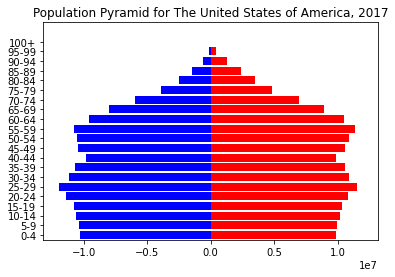

In [33]:
plot_pop_pyramid(plotdf, "The United States of America", 2017)